### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-12-23 21:45:26.249 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1598：股票名稱 ＝ 岱宇，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1711：股票名稱 ＝ 永光，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1722：股票名稱 ＝ 台肥，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1731：股票名稱 ＝ 美吾華，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 2059：股票名稱 ＝ 川湖，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2302：股票名稱 ＝ 麗正，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2317：股票名稱 ＝ 鴻海，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2341：股票名稱 ＝ 英群，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2352：股票名稱 ＝ 佳世達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2361：股票名稱 ＝ 鴻友，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2363：股票名稱 ＝ 矽統，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2369：股票名稱 ＝ 菱生，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2374：股票名稱 ＝ 佳能，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2382：股票名稱 ＝ 廣達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2384：股票名稱 ＝ 勝華，產業類

2025-12-23 21:45:27.188 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-23 21:45:31.133 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-23 21:45:34.997 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-15
【略過】週Ｋ：2025-12-15


2025-12-23 21:46:08.154 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-16


2025-12-23 21:46:15.300 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-17


2025-12-23 21:46:23.571 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-18


2025-12-23 21:46:30.893 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-19


2025-12-23 21:46:38.143 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-23 21:46:42.146 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-23 21:46:45.999 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【更新】日Ｋ：2025-12-22


2025-12-23 21:46:53.313 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2025-12-23


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數開高，持續反彈，往前高邁進。  
> 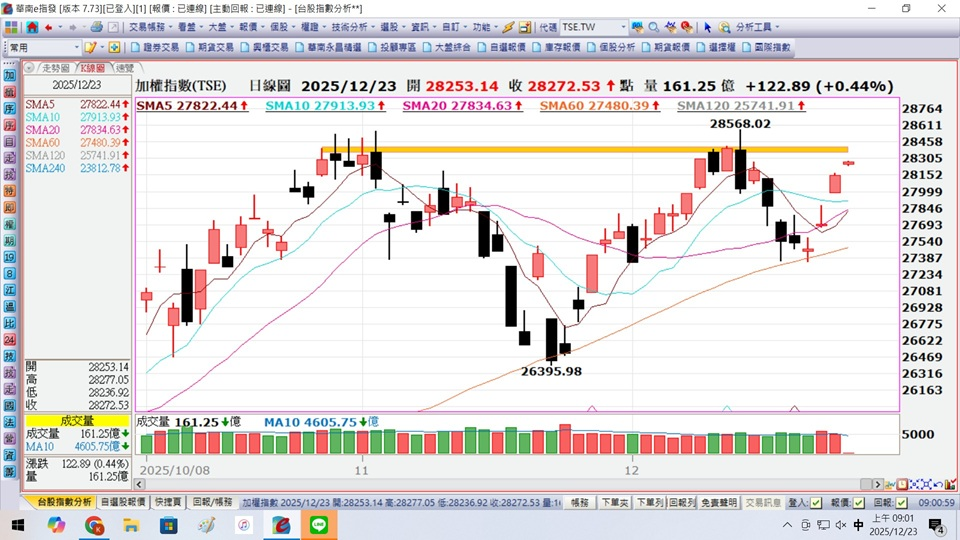  

In [5]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-29'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-12-10']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

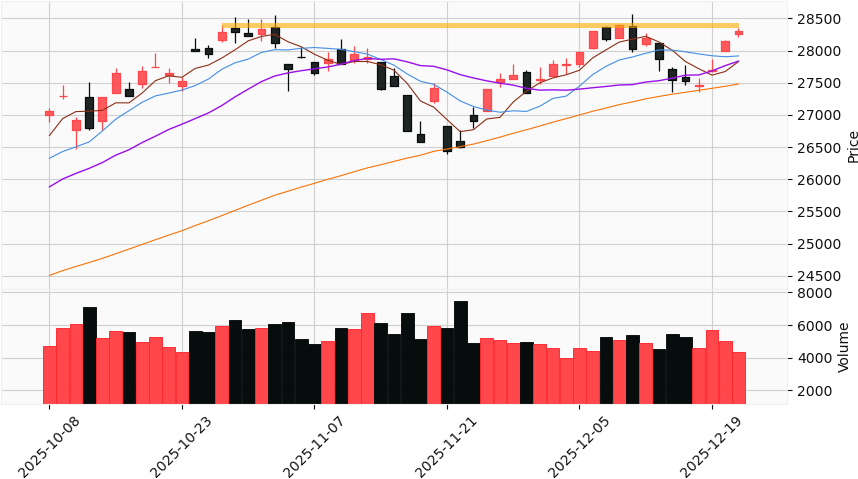

In [6]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TAIEX','2025-10-08','2025-12-23',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


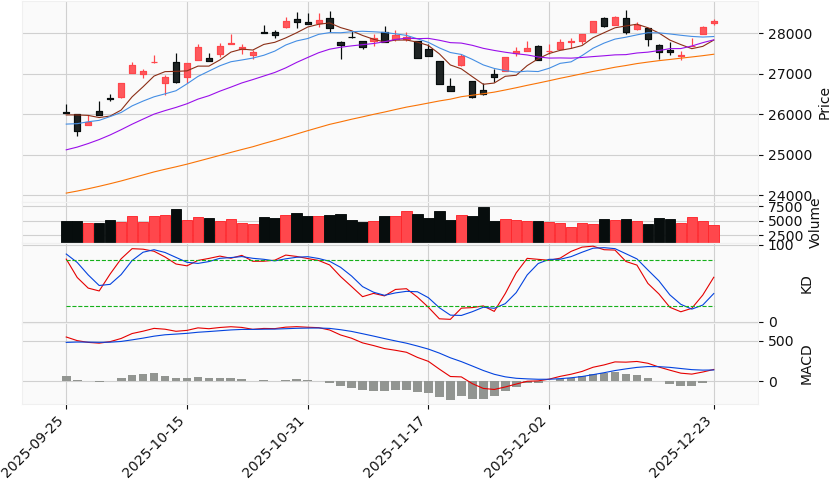

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-18 , 2025-12-19 十字線 : 2025-12-18 , 2025-12-19"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 4319.94億元 ，十日均量 ＝ 5023.51億元）
型態,盤整型態之矩形，型態範圍由2025-10-31開始到2025-12-22結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-19黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。
整體評價,根據圖表分析，以下是對當前市場狀況的技術分析： 價格趨勢 近期價格呈現上漲趨勢，尤其是最近幾個交易日，K線多為紅色，顯示出多頭力量較強。短期移動平均線（5日和10日）向上穿越中期移動平均線（20日），顯示出短期上漲動能。 價量關係 成交量在上漲過程中有所增加，顯示出價量配合良好，支持上漲趨勢。然而，最近幾日成交量略有減少，需注意後續量能是否能持續放大以支持進一步上漲。 支撐與壓力 目前支撐位可參考20日移動平均線附近，約在27800點左右。壓力位則在近期高點28350點附近，若能有效突破此壓力位，將有望進一步上行。 KD指標 KD指標顯示K線快速上升並突破D線，且目前位於50以上，顯示出多頭趨勢強勁，但需注意是否進入超買區域，可能會有回檔風險。 MACD指標 MACD指標中，DIF線已經上穿MACD線，且柱狀體由負轉正，顯示出多頭趨勢增強，短期內有望持續上漲。 綜合評價 綜合以上分析，目前市場呈現多頭趨勢，短期內有望繼續上漲。然而，需密切關注成交量的變化以及KD指標是否進入超買區域，以防止可能的回檔風險。建議投資者在支撐位附近考慮進場，並在壓力位附近適時停利。


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數創高第一天。  
> 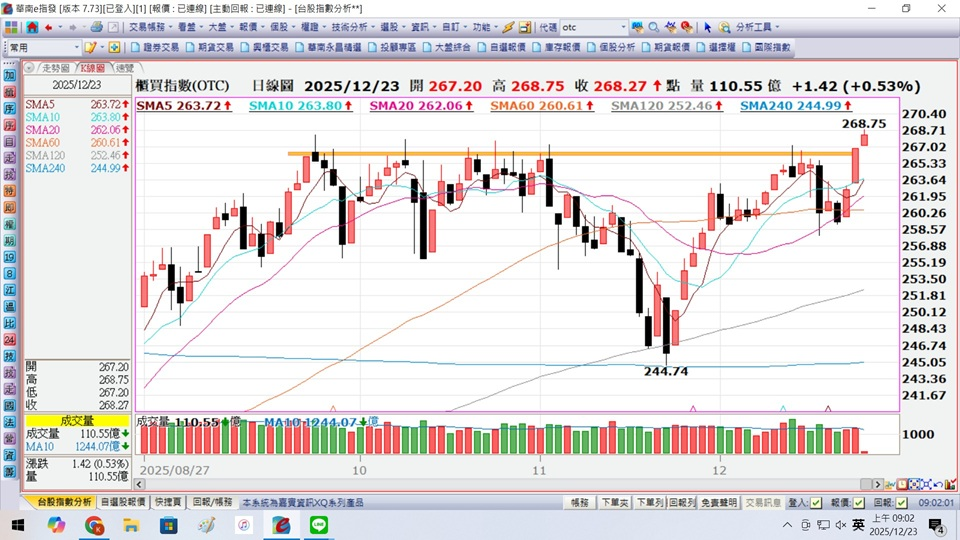  

In [8]:
# 支撐線
def line_drawing_callback( range_prices) :

    # 支撐線
    support_line_start_date = '2025-09-18'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-09-23']['Open']
    
    seq_of_seq_of_points=[
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

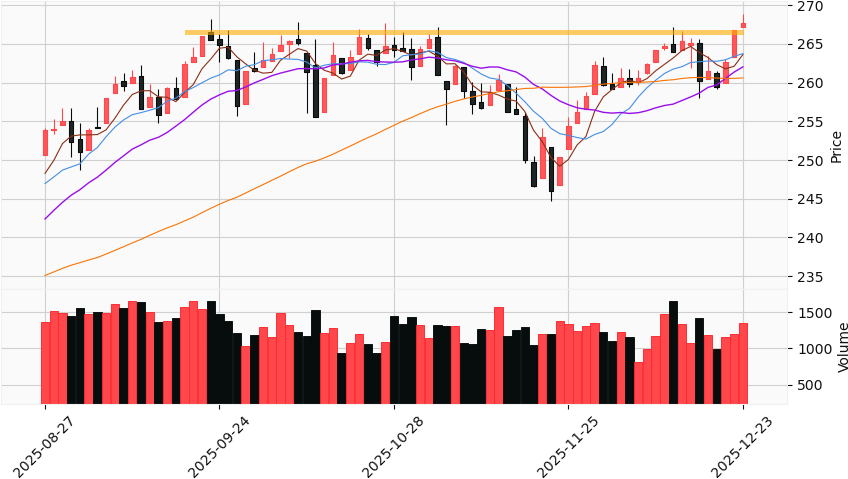

In [9]:
# 收盤：支撐線
image = mysys.DrawOnKlineChart('TPEx','2025-08-27','2025-12-23',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


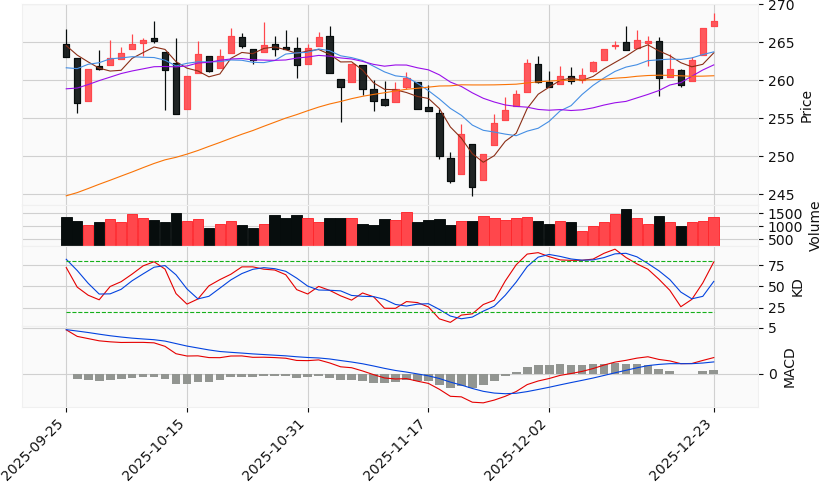

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2025-12-17
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1349.84億元 ，十日均量 ＝ 1284.23億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-22黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現上漲趨勢，尤其在最後幾個交易日中，價格突破了多條移動平均線，顯示出強勁的上升動能。 價量關係 成交量在價格上漲時同步增加，顯示出多頭的強勢，買盤積極，價量配合良好。 支撐與壓力 - 支撐位：短期支撐可參考5日移動平均線附近。 - 壓力位：近期高點附近可能形成壓力，需觀察價格能否有效突破。 KD指標 KD指標顯示K線快速上升並接近超買區，顯示出短期內可能有回檔壓力，但整體仍維持多頭格局。 MACD指標 MACD指標中，DIF線在MACD線之上，且柱狀體持續擴大，顯示出多頭動能增強，短期內仍有上升空間。 綜合評價 整體來看，市場目前處於多頭趨勢，短期內可能會有小幅回檔，但中期上升趨勢仍然明顯。建議投資者可考慮在回檔時分批進場，並設置適當的停損點以控制風險。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

* 華電網(6163)  
  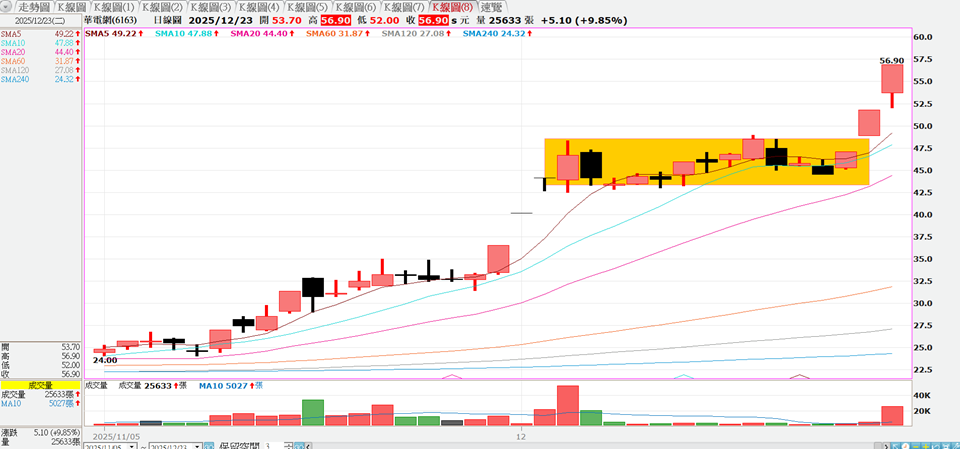  
* 泰鼎-KY(4927)  
  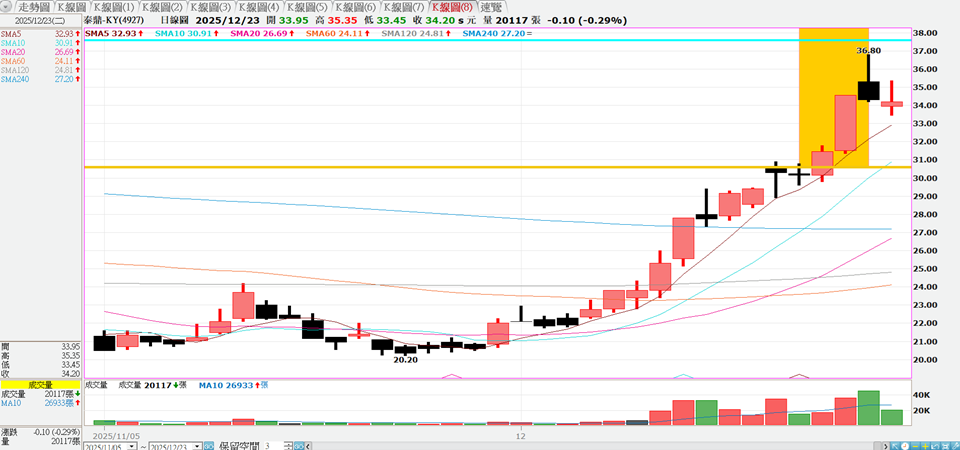  
* 福懋科(8131)  
  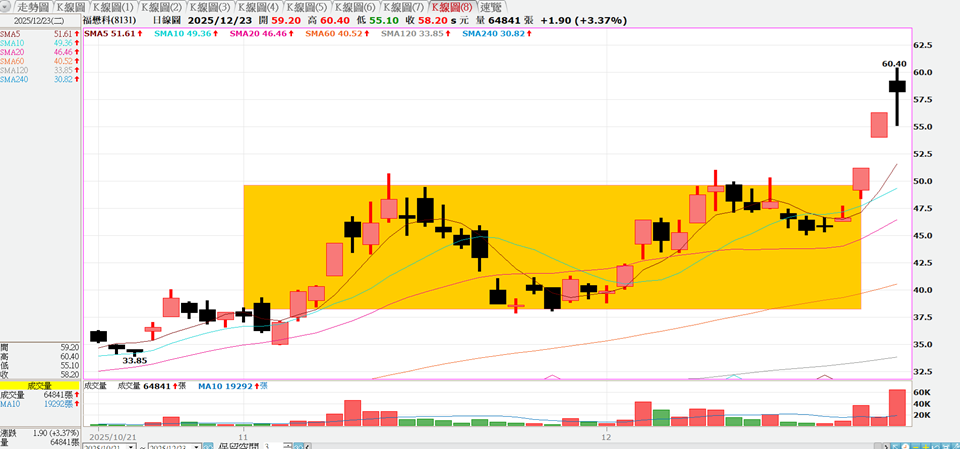  
* 力積電(6770)  
  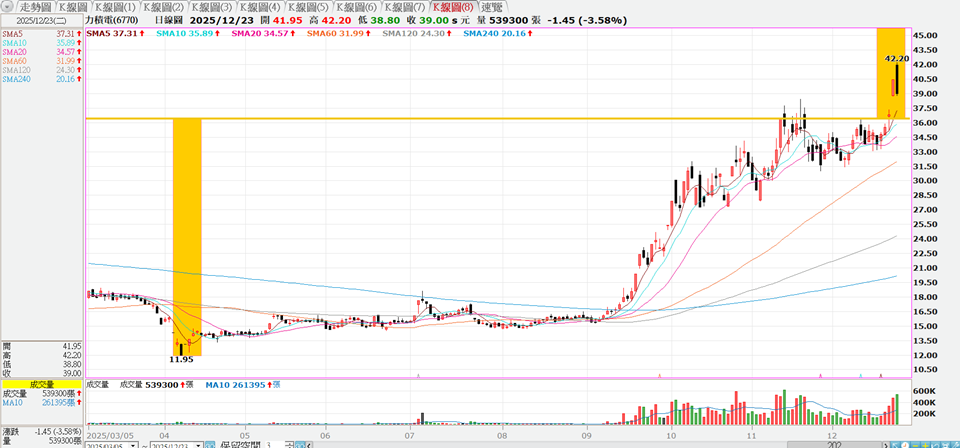  

### 個股解盤  

* 百一(6152)  
  看法：底型突破後續漲。     

> **盤後**：量化技術分析  

解盤內容：


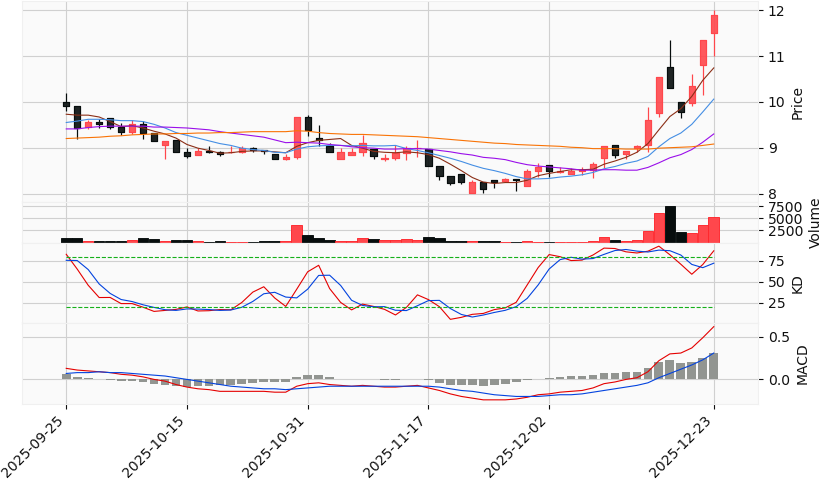

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：大型股爆量（成交量 ＝ 5238張 ，十日均量 ＝ 3030張）
型態,反轉型態之下降楔形，型態範圍由2025-08-06開始到2025-10-17結束。 底型反轉之底部型態，型態範圍由2025-05-28開始到2025-08-04結束，2025-08-05時已達估算之目標價（9.91元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線走平，長期盤整
ＫＤ指標,於2025-12-22黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-08當週黃金交叉。
整體評價,根據圖表分析，以下是對當前市場狀況的技術分析： 價格趨勢 近期價格呈現明顯的上漲趨勢，尤其是最近幾個交易日，價格快速突破多條移動平均線，顯示出強勁的多頭動能。 價量關係 成交量在價格上漲的過程中顯著增加，尤其是在最近幾個交易日，這表明市場對於價格上漲的認同度較高，價量配合良好，支持多頭趨勢。 支撐與壓力 目前的支撐位可考慮在11元附近，這是近期價格回檔的低點。壓力位則在12元以上，因為這是近期的高點，若能有效突破，將有望進一步上行。 KD指標 KD指標顯示K線已進入超買區域，且高於D線，這通常預示著短期內可能會有回檔壓力，但目前多頭趨勢仍然強勁。 MACD指標 MACD指標顯示DIF線高於MACD線，且柱狀體持續增長，這表明多頭趨勢仍在延續，市場情緒偏向樂觀。 綜合評價 綜合以上分析，目前市場處於強勁的多頭趨勢中，短期內可能會有回檔壓力，但整體上行趨勢未改。建議投資者可考慮在回檔時分批進場，並設置適當的停損位以控制風險。若價格能有效突破12元，則有望進一步上行。


In [11]:
stock_analysis(analysis,'6152')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-25'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-05']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-12-22'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為13.49元


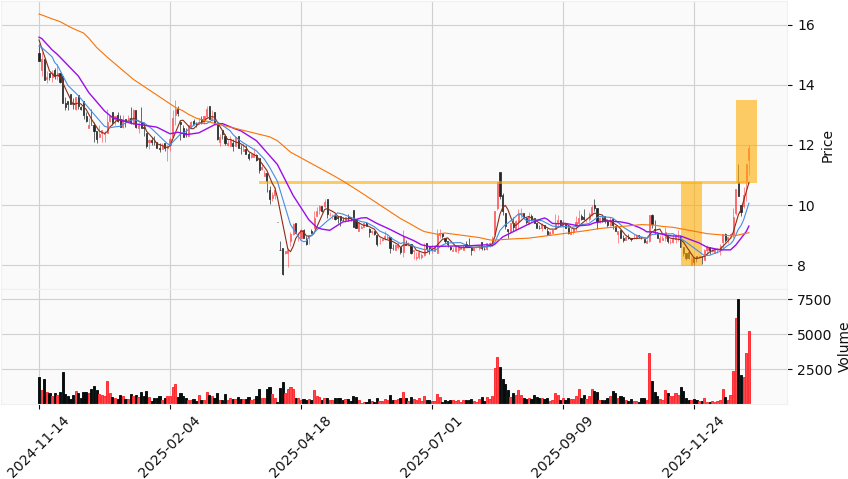

In [13]:
image = mysys.DrawOnKlineChart('6152','2024-11-14','2025-12-23',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-146)：外資小賣(-144)、投信中立(0)、自營小賣(-2)。  
主力小賣(-192)。  
分公司買賣家數差分散(-10)。  
融資中立(0)、融券中立(0)。   